# Named entity recognition

The exercise shows how we may extract elements such as names of companies, countries and similar objects from text.

## Tasks

Objectives (8 points):

Imports

In [1]:
import datasets
import pandas as pd
import spacy
from spacy import displacy
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt

1. Read the API of [NER](https://spacy.io/api/entityrecognizer) in Spacy
2. Take 1 thousand random passages from the FIQA-PL corpus.

In [2]:
data = datasets.load_dataset("clarin-knext/fiqa-pl", "corpus", split="corpus") 

In [3]:
data

Dataset({
    features: ['_id', 'title', 'text'],
    num_rows: 57638
})

In [4]:
df = pd.DataFrame(data).sample(n=1000)

In [5]:
df

,_id,title,text
1929,20102,,>Ci ludzie są utrzymywani poniżej standardu ży...
24062,249273,,"Dow Jones jest bezsensownym indeksem, o którym..."
40599,422783,,"> Myślę, że on myśli, że nie może być rasistow..."
1549,16270,,"W Houston w Teksasie w USA, gdzie chodziłem do..."
24648,255096,,"Uber musi być pierwszym, który stworzy flotę t..."
...,...,...,...
6957,71692,,"„Przepraszam, nie. Nie lubię słyszeć, że różni..."
39809,414284,,"„Ogólnie rzecz biorąc, przestrzeganie instrukc..."
34124,354058,,"nie, to tylko problem ze związkiem policyjnym...."
18914,196385,,Samochód stworzył mnóstwo miejsc pracy. Widzie...


3. Use the lemmatized and sentence split documents (using SpaCy API for [lemmatization](https://spacy.io/api/lemmatizer) and [sentence splitting](https://spacy.io/api/sentencizer)) to identify the expressions that consist of consecutive
   words starting with a capital letter (you will have to look at the inflected form of the word to check its
   capitalization) that do not occupy the first position in a sentence. E.g. the sentence:
   ```
   Wczoraj w Krakowie miało miejsce spotkanie prezydentów Polski i Stanów Zjednoczonych.
   ```
   should yield the following entries: `Kraków`, `Polska`, `Stan Zjednoczony`.

In [6]:
nlp = spacy.load("pl_core_news_sm")

In [7]:
def getConsecutiveWords(text):
    tokens = []
    tmp = ""
    doc = nlp(text)

    for sentence in doc.sents:
        for idx, token in enumerate(sentence):
            if idx != 0: 
                if token.text[0] == token.text[0].upper() and token.text[0].isalpha():
                    lemma = token.lemma_
                    lemma = lemma[0].upper() + lemma[1:]
                    if len(tmp) > 0:
                        tmp += " " 
                    tmp += lemma
                elif len(tmp) > 0:
                    tokens.append(tmp)
                    tmp = ""
                    
    return tokens

In [9]:
text = ("Wczoraj w Krakowie miało miejsce spotkanie prezydentów Polski i Stanów Zjednoczonych. ")
print(getConsecutiveWords(text))

['Kraków', 'Polska', 'Stany Zjednoczone']


In [10]:
text = "Stany Zjednoczone to kraj w Ameryce Północnej."
doc = nlp(text)

for token in doc:
    print(f"Token: {token.text}, Lemmatized: {token.lemma_}, POS: {token.pos_}")

Token: Stany, Lemmatized: Stany, POS: PROPN
Token: Zjednoczone, Lemmatized: Zjednoczone, POS: ADJ
Token: to, Lemmatized: to, POS: AUX
Token: kraj, Lemmatized: kraj, POS: NOUN
Token: w, Lemmatized: w, POS: ADP
Token: Ameryce, Lemmatized: Ameryka, POS: PROPN
Token: Północnej, Lemmatized: północny, POS: ADJ
Token: ., Lemmatized: ., POS: PUNCT


In [11]:
corrections = {
    "Stany Zjednoczone": "Stan Zjednoczony"
}

def lemmatize_with_corrections(phrase):
    if phrase in corrections:
        return corrections[phrase]
    doc = nlp(phrase)
    lemmatized_tokens = [token.lemma_ for token in doc if token.is_alpha]
    return " ".join(lemmatized_tokens)

print(lemmatize_with_corrections("Stany Zjednoczone"))

Stan Zjednoczony


The issue with the phrase "Stany Zjednoczone" in pl_core_news_sm arises because the model does not correctly lemmatize plural forms into singular forms for multi-word expressions. For example, "Stany" remains "Stany" instead of "Stan," and "Zjednoczone" remains "Zjednoczone" instead of "Zjednoczony."

To address this, I implemented a correction mechanism using a dictionary of exceptions (corrections) to manually map problematic plural phrases to their singular equivalents (e.g., "Stany Zjednoczone" -> "Stan Zjednoczony"). 

4. Compute the frequency of each identified expression and print 50 results with the largest number of occurrences.

In [12]:
frequency_list = Counter()

for text in tqdm(df['text']):
    words = getConsecutiveWords(text)
    words = Counter(words)
    frequency_list.update(words)

100%|██████████| 1000/1000 [00:35<00:00, 28.49it/s]


In [13]:
frequency_list.most_common(50)

[('Dolar_amerykański', 235),
 ('Twój', 180),
 ('USA', 92),
 ('Ty', 88),
 ('Nie', 62),
 ('IRS', 36),
 ('Ciebie', 35),
 ('To', 35),
 ('IRA', 35),
 ('ETF', 34),
 ('Kalifornia', 33),
 ('Stany Zjednoczone', 31),
 ('W', 30),
 ('Jeśli', 29),
 ('Apple', 22),
 ('Amazon', 21),
 ('Być', 20),
 ('X', 20),
 ('Nowy Jork', 18),
 ('Google', 17),
 ('HSA', 16),
 ('Tak', 15),
 ('K', 15),
 ('Trump', 15),
 ('MBS', 15),
 ('Indie', 14),
 ('Facebook', 14),
 ('A', 14),
 ('Czy', 13),
 ('S&P', 12),
 ('Po', 12),
 ('Kanada', 12),
 ('Wielki Brytania', 12),
 ('S', 12),
 ('LLC', 12),
 ('TotesMessenger', 12),
 ('Roth', 12),
 ('Twoją', 11),
 ('ACH', 11),
 ('Sie', 11),
 ('RRSP', 10),
 ('Ameryka', 10),
 ('Sculley', 10),
 ('Wersja', 10),
 ('SEC', 10),
 ('MBA', 10),
 ('Ten', 9),
 ('Internet', 9),
 ('IT', 9),
 ('Amerykanów', 9)]

5. Apply the NER from SpaCy to identify the named entities in the same set of documents.

In [14]:
def getEntities(text):
    tokens = []
    doc = nlp(text)

    for ent in doc.ents:
        tokens.append((ent.lemma_, ent.label_))
    return tokens

In [15]:
text = "Wczoraj w Krakowie miało miejsce spotkanie prezydentów Polski i Stanów Zjednoczonych."
print(getEntities(text))

[('Kraków', 'placeName'), ('Polska', 'placeName'), ('Stany Zjednoczone', 'placeName')]


6. Plot the frequency (histogram) of the identified classes.


In [16]:
entity_classes = Counter()

for text in tqdm(df['text']):
    ents = getEntities(text)
    ents_labels = [item[1] for item in ents]
    ents_labels = Counter(ents_labels)
    entity_classes.update(ents_labels)
print(entity_classes)

100%|██████████| 1000/1000 [00:33<00:00, 30.25it/s]

Counter({'orgName': 896, 'persName': 767, 'placeName': 688, 'date': 222, 'geogName': 90, 'time': 10})


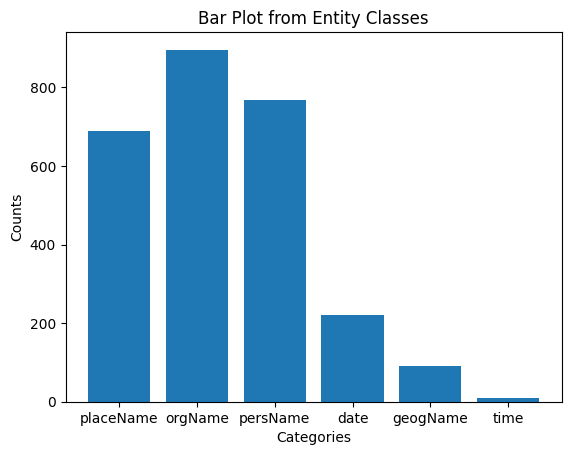

In [17]:
categories = list(entity_classes.keys())
counts = list(entity_classes.values())

plt.bar(categories, counts)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Plot from Entity Classes')

plt.show()

7. Display 10 most frequent Named Entities for each identified type.

In [18]:
counters_per_class = {}

for class_name in entity_classes.keys():
    counters_per_class[class_name] = Counter()

for text in tqdm(df['text']):
    ents = getEntities(text)
    
    for ent in ents:
        counters_per_class[ent[1]].update([ent[0]])

100%|██████████| 1000/1000 [00:34<00:00, 28.76it/s]


In [19]:
counters_per_class['placeName'].most_common(10)

[('USA', 97),
 ('amerykański', 65),
 ('Stany Zjednoczone', 32),
 ('kalifornia', 23),
 ('nowy Jork', 16),
 ('Indie', 14),
 ('Wielki Brytania', 11),
 ('Ameryka', 10),
 ('Kanada', 9),
 ('Amerykanów', 9)]

In [20]:
counters_per_class['orgName'].most_common(10)

[('IRA', 39),
 ('ETF', 36),
 ('IRS', 25),
 ('Google', 22),
 ('Apple', 18),
 ('HSA', 16),
 ('MBS', 13),
 ('LLC', 12),
 ('IMO', 11),
 ('Roth', 10)]

In [21]:
counters_per_class['persName'].most_common(10)

[('Amazon', 19),
 ('Trump', 15),
 ('sald', 12),
 ('Excel', 8),
 ('gdyby być', 8),
 ('Vanguard', 8),
 ('amazon', 8),
 ('Rotha', 8),
 ('Gdybyś', 6),
 ('Sculley', 6)]

In [22]:
counters_per_class['date'].most_common(10)

[('1040', 8),
 ('2008 rok', 6),
 ('2017', 6),
 ('2008', 6),
 ('rok 80.', 5),
 ('2016 rok.', 5),
 ('rok 70.', 4),
 ('1933 rok.', 4),
 ('2009', 4),
 ('2009 rok.', 4)]

In [23]:
counters_per_class['geogName'].most_common(10)

[('Europa', 8),
 ('europejski', 6),
 ('Ziemia', 3),
 ('Monte Carlo', 2),
 ("McDonald's", 2),
 ('Mars', 2),
 ('Wall Street', 2),
 ('Pacyfik', 2),
 ('dochód', 2),
 ('Expenses', 2)]

In [24]:
counters_per_class['time'].most_common(10)

[('15.', 1),
 ('00', 1),
 ('19.', 1),
 ('90', 1),
 ('20.', 1),
 ('10', 1),
 ('godzina 14:00', 1),
 ('16', 1),
 ('godzina 16:00', 1),
 ('10 rano', 1)]

8. Display 50 most frequent Named Entities including their count and type.

In [25]:
entities = Counter()

for text in tqdm(df['text']):
    ents = getEntities(text)
    ents = Counter(ents)
    entities.update(ents)

100%|██████████| 1000/1000 [00:30<00:00, 32.91it/s]


In [26]:
entities.most_common(50)

[(('USA', 'placeName'), 97),
 (('amerykański', 'placeName'), 65),
 (('IRA', 'orgName'), 39),
 (('ETF', 'orgName'), 36),
 (('Stany Zjednoczone', 'placeName'), 32),
 (('IRS', 'orgName'), 25),
 (('kalifornia', 'placeName'), 23),
 (('Google', 'orgName'), 22),
 (('Amazon', 'persName'), 19),
 (('Apple', 'orgName'), 18),
 (('nowy Jork', 'placeName'), 16),
 (('HSA', 'orgName'), 16),
 (('Trump', 'persName'), 15),
 (('Indie', 'placeName'), 14),
 (('MBS', 'orgName'), 13),
 (('sald', 'persName'), 12),
 (('LLC', 'orgName'), 12),
 (('IMO', 'orgName'), 11),
 (('Wielki Brytania', 'placeName'), 11),
 (('Ameryka', 'placeName'), 10),
 (('Roth', 'orgName'), 10),
 (('Kanada', 'placeName'), 9),
 (('Amerykanów', 'placeName'), 9),
 (('LOC', 'orgName'), 9),
 (('Excel', 'persName'), 8),
 (('kanadyjski', 'placeName'), 8),
 (('SPY', 'orgName'), 8),
 (('gdyby być', 'persName'), 8),
 (('1040', 'date'), 8),
 (('Vanguard', 'persName'), 8),
 (('Europa', 'geogName'), 8),
 (('amazon', 'persName'), 8),
 (('Rotha', 'persN

9. Display 5 sentences containing at least 2 recognized named entities with different types. Highlight the recognized spans with color.
   (For demo application [Streamlit](https://streamlit.io/) might be useful for displaying NER results).

In [27]:
corpus_ids = []
i = 0
for idx, text in enumerate(df['text']):
    if i == 5:
        break
    
    tokens = []
    doc = nlp(text)

    labels = [ent.label_ for ent in doc.ents]
    labels = Counter(labels)
    if len(labels) >= 2:
        displacy.render(doc, style='ent', jupyter=True)
        corpus_ids.append(idx)
        i+=1

#### Answer the following questions (2 points):

**1. Which of the method (counting expressions with capital letters vs. NER) worked better for the task concerned with
  identification of the proper names?**
  
Named Entity Recognition (NER) worked better because counting capitalized words is a simplistic approach. While it matches all words that start with a capital letter, it doesn’t account for context or relevance, leading to many irrelevant results. NER, on the other hand, applies contextual filtering and identifies actual named entities, making it more precise.
  
**2. What are the drawbacks of the method based on capital letters?**

The main drawback is the high number of false positives. Many words that start with a capital letter are not proper names or relevant to the task, such as the first word of a sentence or generic nouns. This lack of specificity reduces its effectiveness.

**3. What are the drawbacks of the method based on NER?**

NER is model-dependent, meaning its accuracy relies on the quality of the model used. It may fail to recognize certain entities, especially in contexts or languages the model wasn’t trained on, leading to missed entities (false negatives).

**4. Which of the coarse-grained NER groups has the best and which has the worst results? Try to justify this
  observation.**
  
- Best: orgName had the best results because organizational names are often standardized and consistently written, particularly in English.
- Worst: date performed the worst due to the numerous ways dates can be expressed, including different formats, languages, and even informal phrasing, making it harder for the model to generalize.
  
**5. Do you think NER is sufficient for identifying different occurrences of the same entity (i.e. consider "USA" and
  "Stany Zjednoczone" and "Stany Zjednoczone Ameryki Północnej")? If not, can you suggest an algorithm or a tool that
  would be able to group such names together?**
  
NER alone is not sufficient for grouping such variations, as it focuses on recognizing entities rather than linking them. A possible solution would be to use entity linking algorithms or knowledge graphs that map different expressions to the same entity, such as spaCy’s EntityLinker or external tools like DBpedia Spotlight or Wikipedia-based entity disambiguation.
  
**6. Can you think of a real world problem that would benefit the most from application of Named Entity Recognition
  algorithm?**
 
A good example is search engines. For instance, the word "Apple" could refer to a fruit or the tech company, depending on context. NER can help disambiguate such terms, ensuring more relevant search results by understanding the context in which a name is used.

## Hints

1. Named entity recognition is a process aimed at the identification of entities mentioned in text by determining their
   scope and classifying them to a predefined type. The larger the number of types, the more difficult the problem is.
2. Named entities are usually proper names and temporal expressions. They usually convey the most important information
   in text.
3. IOB format is typically used to tag names entities. The name (IOB) comes from the types of tokens (_in_, _out_, _beginning_).
   The following example shows how the format works:
   ```
   W            O
   1776         B-TIME
   niemiecki    O
   zoolog       O
   Peter        B-PER
   Simon        I-PER
   Pallas       I-PER
   dokonał      O
   formalnego   O
   ...
   ```
4. The set of classes used in NER is partially task dependent. Some general classes such as names of people or cities
   are used universally, but categories such as references to law regulations is specific to legal information systems.